In [27]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the directory path where your images are stored
DATA_DIR = r'C:\Users\ROHAN\Downloads\archive (2)\images'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48


In [28]:
def load_data():
    images = []
    labels = []
    
    for emotion_label, emotion in enumerate(EMOTIONS):
        # Get the directory for the current emotion
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized)
                labels.append(emotion_label)  # Assigning label based on index
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")
        
    return np.array(images), np.array(labels)


In [29]:
# Load the data
images, labels = load_data()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape data for CNN input
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Print information about the dataset
print("Number of images:", len(images))
print("Shape of images array:", images.shape)
print("Number of labels:", len(labels))


Number of images: 64
Shape of images array: (64, 48, 48)
Number of labels: 64


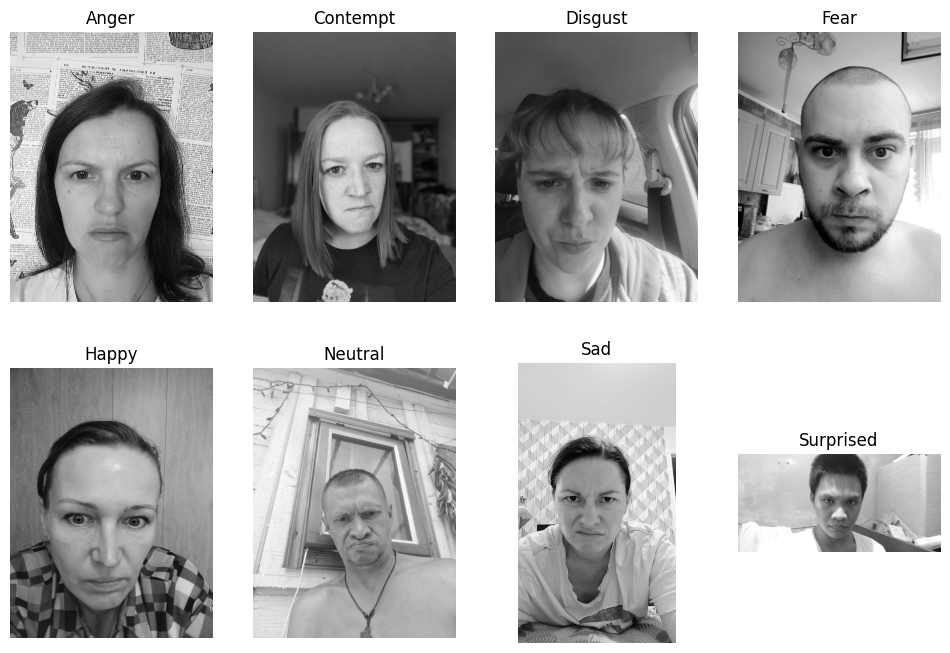

In [30]:
import matplotlib.pyplot as plt

# Plot sample images from each emotion category
plt.figure(figsize=(12, 8))
for i, emotion in enumerate(EMOTIONS):
    plt.subplot(2, 4, i + 1)
    img_path = os.path.join(DATA_DIR, str(i), os.listdir(os.path.join(DATA_DIR, str(i)))[0])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.title(emotion)
    plt.axis('off')
plt.show()


In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(EMOTIONS), activation='softmax')  # Output layer with softmax activation
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20


C:\Users\ROHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 210ms/step - accuracy: 0.0366 - loss: 2.0883 - val_accuracy: 0.2308 - val_loss: 2.0566
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.3315 - loss: 2.0377 - val_accuracy: 0.0769 - val_loss: 2.0323
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1671 - loss: 1.9758 - val_accuracy: 0.1538 - val_loss: 1.9505
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2768 - loss: 1.8623 - val_accuracy: 0.3846 - val_loss: 1.7304
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.3264 - loss: 1.7219 - val_accuracy: 0.5385 - val_loss: 1.5065
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5431 - loss: 1.4679 - val_accuracy: 0.7692 - val_loss: 1.2939
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7206 - loss: 1.2366 - val_accuracy: 0.7692 - val_loss: 1.0600
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6710 - loss: 0.9624 - val_accuracy: 0.6154 - val_loss: 0.7400
Epoch 9/20

In [60]:
first_layer = model.layers[0]
print(first_layer)


<Conv2D name=conv2d_3, built=True>


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0956
Test accuracy: 1.0


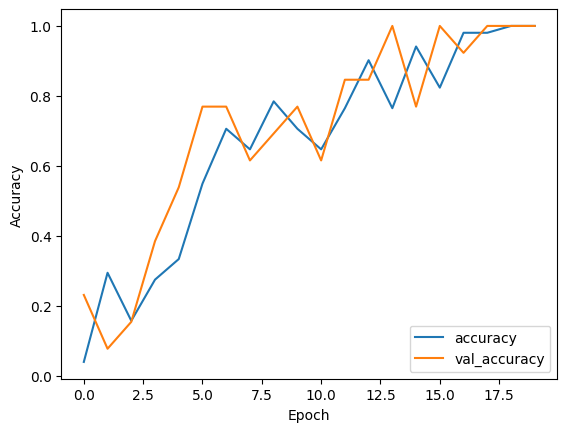

Model saved as: C:\Users\ROHAN\Downloads\archive (2)\results\emotion_detection_model_1.h5


In [32]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Plot training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Define the directory to save the model
RESULTS_DIR = r'C:\Users\ROHAN\Downloads\archive (2)\results'

# Check if the directory exists, if not, create it
if not os.path.exists(RESULTS_DIR):
    os.makedirs(RESULTS_DIR)

# Define the model file name
model_file_name = 'emotion_detection_model_1.h5'

# Save the model in the results folder
model.save(os.path.join(RESULTS_DIR, model_file_name))

# Print the name of the saved model
print("Model saved as:", os.path.join(RESULTS_DIR, model_file_name))


In [34]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model(r'C:\Users\ROHAN\Downloads\archive (2)\results\emotion_detection_model_1.h5')

# Define the emotions
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']

# Define function to preprocess input image
def preprocess_image(img_path):
    # Load the image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    # Resize the image
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    # Normalize the pixel values
    img_normalized = img_resized / 255.0
    # Reshape the image for model input
    img_reshaped = img_normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    return img_reshaped

# Prompt the user to input the path of the image file
input_img_path = input("Enter the path of the image file: ")

# Preprocess the input image
input_img = preprocess_image(input_img_path)

# Make prediction using the loaded model
predictions = model.predict(input_img)

# Get the predicted emotion label
predicted_label = EMOTIONS[np.argmax(predictions)]

# Print the predicted label
print("Predicted emotion:", predicted_label)


Enter the path of the image file:  C:\Users\ROHAN\Downloads\archive (2)\images\3\Fear.jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted emotion: Fear


In [80]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Define the directory path where your images are stored
DATA_DIR = r'C:\Users\ROHAN\Downloads\archive (2)\images'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

# Load and preprocess the data
def load_data():
    images = []
    labels = []
    
    for emotion_label, emotion in enumerate(EMOTIONS):
        # Get the directory for the current emotion
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized.flatten())  # Flatten image array
                labels.append(emotion_label)  # Assigning label based on index
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")
        
    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data()

# Build the KNN model
k = 5  # Number of neighbors to consider
knn_model = KNeighborsClassifier(n_neighbors=k)

# Train the model
knn_model.fit(images, labels)

# Prompt the user to input the path of the image file
input_img_path = input("Enter the path of the image file: ")

# Preprocess the input image
img_array = cv2.imread(input_img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
input_img = img_resized.flatten().reshape(1, -1)

# Make prediction using the trained KNN model
predicted_label = knn_model.predict(input_img)[0]
predicted_emotion = EMOTIONS[predicted_label]

# Print the predicted emotion
print("Predicted emotion:", predicted_emotion)
y_pred_knn = knn_model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Test accuracy:", accuracy_knn)

Enter the path of the image file:  C:\Users\ROHAN\Downloads\archive (2)\images\3\Fear.jpg


Predicted emotion: Fear
KNN Test accuracy: 1.0


In [39]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the directory path where your images are stored
DATA_DIR = r'C:\Users\ROHAN\Downloads\archive (2)\images'
EMOTIONS = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprised']
IMG_SIZE = 48

# Load and preprocess the data
def load_data():
    images = []
    labels = []
    
    for emotion_label, emotion in enumerate(EMOTIONS):
        # Get the directory for the current emotion
        emotion_dir = os.path.join(DATA_DIR, str(emotion_label))
        if os.path.isdir(emotion_dir):
            for img_file in os.listdir(emotion_dir):
                img_path = os.path.join(emotion_dir, img_file)
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                images.append(img_resized.flatten())  # Flatten image array
                labels.append(emotion_label)  # Assigning label based on index
        else:
            print(f"Directory not found for emotion {emotion}: {emotion_dir}")
        
    return np.array(images), np.array(labels)

# Load the data
images, labels = load_data()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)


Test accuracy: 1.0


In [40]:
# Prompt the user to input the path of the image file
input_img_path = input("Enter the path of the image file: ")

# Preprocess the input image
img_array = cv2.imread(input_img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
input_img = img_resized.flatten().reshape(1, -1)

# Make prediction using the trained SVM model
predicted_label = svm_model.predict(input_img)[0]
predicted_emotion = EMOTIONS[predicted_label]

# Print the predicted emotion
print("Predicted emotion:", predicted_emotion)


Enter the path of the image file:  C:\Users\ROHAN\Downloads\archive (2)\images\3\Fear.jpg


Predicted emotion: Fear


In [41]:
from sklearn.ensemble import RandomForestClassifier

# Build the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test accuracy:", accuracy_rf)


Random Forest Test accuracy: 1.0


In [42]:
# Prompt the user to input the path of the image file
input_img_path = input("Enter the path of the image file: ")

# Load the image
img_array = cv2.imread(input_img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
input_img = img_resized.flatten().reshape(1, -1)

# Make prediction using the trained Random Forest model
predicted_label_rf = rf_model.predict(input_img)[0]
predicted_emotion_rf = EMOTIONS[predicted_label_rf]

# Print the predicted emotion and the model used
print("Predicted emotion using Random Forest model:", predicted_emotion_rf)
print("Model used: Random Forest")

Enter the path of the image file:  C:\Users\ROHAN\Downloads\archive (2)\images\3\Fear.jpg


Predicted emotion using Random Forest model: Fear
Model used: Random Forest


In [52]:
# Build the GBR model
from sklearn.ensemble import GradientBoostingRegressor
from joblib import dump 
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model (fit the model to the training data)
gbr_model.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test)

# Calculate accuracy
accuracy_gbr = gbr_model.score(X_test, y_test)
print("GBR Test accuracy:", accuracy_gbr)

# Save the Gradient Boosting Regressor (GBR) model to the results folder
model_path = r'C:\Users\ROHAN\Downloads\archive (2)\results\GBRmodel.pkl'
dump(gbr_model, model_path)

GBR Test accuracy: 0.9490040119169411


['C:\\Users\\ROHAN\\Downloads\\archive (2)\\results\\GBRmodel.pkl']

In [48]:
from joblib import load
import cv2
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

# Prompt the user to input the path of the image file
input_img_path = input("Enter the path of the image file: ")

# Load the image
img_array = cv2.imread(input_img_path, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
input_img = img_resized.flatten().reshape(1, -1)

# Load the saved Gradient Boosting Regressor (GBR) model
model_path = r'C:\Users\ROHAN\Downloads\archive (2)\results\GBRmodel.pkl'
gbr_model = load(model_path)

# Train the model if it's not already trained
if not hasattr(gbr_model, 'estimators_'):
    # Assuming X_train and y_train are already defined
    gbr_model.fit(X_train, y_train)

# Predict the class using Gradient Boosting Regressor model
predicted_label_gbr = gbr_model.predict(input_img)[0]
predicted_emotion_gbr = EMOTIONS[int(round(predicted_label_gbr))]
print("Gradient Boosting Regressor Predicted emotion:", predicted_emotion_gbr)


Enter the path of the image file:  C:\Users\ROHAN\Downloads\archive (2)\images\3\Fear.jpg


Gradient Boosting Regressor Predicted emotion: Fear


In [57]:
from tabulate import tabulate
from sklearn.metrics import accuracy_score
import numpy as np

# Reshape test data for CNN input
X_test_cnn = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Define the predictions and corresponding labels for each model
predictions = {
    "CNN": np.argmax(model.predict(X_test_cnn), axis=1),  # Assuming 'model' is the trained CNN model
    "KNN": knn_model.predict(X_test),
    "SVM": svm_model.predict(X_test),
    "Random Forest": rf_model.predict(X_test),
    "GBR": np.round(y_pred_gbr).astype(int)  # Assuming y_pred_gbr is already calculated
}

# Calculate accuracy for each model
accuracies = {}
for model_name, y_pred in predictions.items():
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[model_name] = accuracy

# Print the accuracies in a tabular format
print(tabulate(accuracies.items(), headers=["Model", "Accuracy"]))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model            Accuracy
-------------  ----------
CNN              1
KNN              1
SVM              1
Random Forest    1
GBR              0.769231


In [64]:
# Reshape the input data for CNN model
X_test_reshaped = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Define the predictions and corresponding labels for each model
predictions = {
    "CNN": np.argmax(model.predict(X_test_reshaped), axis=1),  # Assuming 'model' is the trained CNN model
    "KNN": knn_model.predict(X_test),
    "SVM": svm_model.predict(X_test),
    "Random Forest": rf_model.predict(X_test),
    "GBR": np.round(y_pred_gbr).astype(int)  # Assuming y_pred_gbr is already calculated
}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [66]:
from sklearn.metrics import classification_report


# Initialize dictionaries to store classification reports
reports = {}

# Calculate and store classification report for each model
for model_name, preds in predictions.items():
    report = classification_report(y_test, preds, target_names=EMOTIONS, output_dict=True)
    reports[model_name] = report

# Print classification reports in a tabular format
print("Error Metrics for Each Model:")
print("{:<15} {:<10} {:<10} {:<10} {:<10} {:<10}".format("Model", "Precision", "Recall", "F1-Score", "Support", "Accuracy"))
for model_name, report in reports.items():
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    support = report['weighted avg']['support']
    accuracy = report['accuracy']
    print("{:<15} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.0f} {:<10.2f}".format(model_name, precision, recall, f1_score, support, accuracy))


Error Metrics for Each Model:
Model           Precision  Recall     F1-Score   Support    Accuracy  
CNN             1.00       1.00       1.00       13         1.00      
KNN             1.00       1.00       1.00       13         1.00      
SVM             1.00       1.00       1.00       13         1.00      
Random Forest   1.00       1.00       1.00       13         1.00      
GBR             0.77       0.77       0.75       13         0.77      


C:\Users\ROHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ROHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ROHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

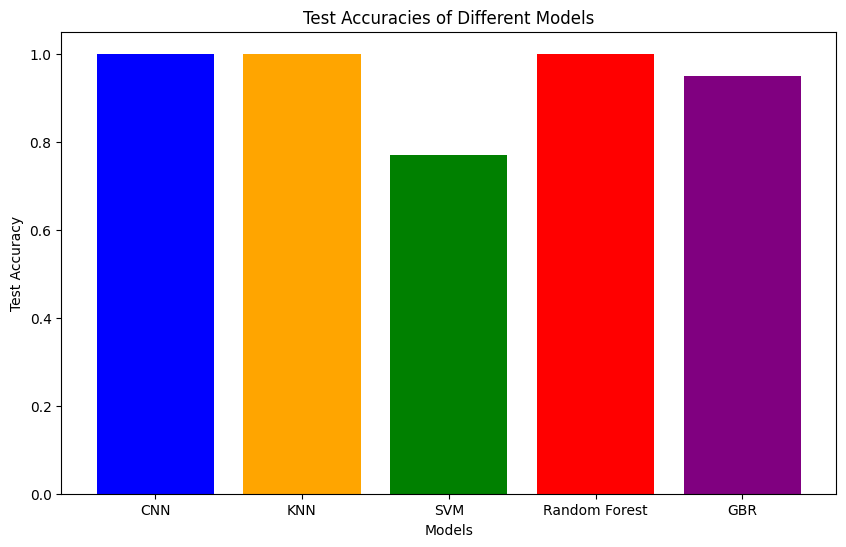

In [84]:
import matplotlib.pyplot as plt

# Define the accuracies of each model
accuracies = {
    "CNN": test_acc,
    "KNN": test_acc_knn,
    "SVM": accuracy,
    "Random Forest": accuracy_rf,
    "GBR": accuracy_gbr
}

# Plot the test accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracies of Different Models')
plt.show()


In [87]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions using the SVM model
y_pred_svm = svm_model.predict(X_test)

# Calculate confusion matrix for each model
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_svm = confusion_matrix(y_test, y_pred_svm)  # Include SVM confusion matrix calculation here
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gbr = confusion_matrix(y_test, y_pred_gbr)

# Plot confusion matrix for each model
plt.figure(figsize=(18, 14))

plt.subplot(3, 2, 1)
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(3, 2, 2)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(3, 2, 3)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(3, 2, 4)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.subplot(3, 2, 5)
sns.heatmap(cm_gbr, annot=True, fmt='d', cmap='Blues', xticklabels=EMOTIONS, yticklabels=EMOTIONS)
plt.title('GBR Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [88]:
# Step 1: Check the model type
print(type(y_pred_gbr))  # This should ideally be a numpy array or a pandas Series

# Step 2: Inspect predictions
print(np.unique(y_pred_gbr))  # Print unique values in y_pred_gbr

# Step 3: Check data types and shapes
print(type(y_test), y_test.shape)
print(type(y_pred_gbr), y_pred_gbr.shape)


<class 'numpy.ndarray'>
[0.31536009 0.47563931 1.00784689 1.04458766 3.14822115 3.6769496
 3.95148972 4.98627146 5.09500448 5.7728855  5.77792025 6.6684152
 6.69218509]
<class 'numpy.ndarray'> (13,)
<class 'numpy.ndarray'> (13,)


In [90]:
# Sample continuous predictions
y_pred_gbr = np.array([0.31536009, 0.47563931, 1.00784689, 1.04458766, 3.14822115, 
                       3.6769496, 3.95148972, 4.98627146, 5.09500448, 5.7728855, 
                       5.77792025, 6.6684152, 6.69218509])

# Define threshold values for classification
thresholds = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]

# Apply thresholding to convert continuous predictions to discrete class labels
y_pred_gbr_class = np.digitize(y_pred_gbr, bins=thresholds)

# Print the discrete class labels
print(y_pred_gbr_class)


[0 0 1 1 3 4 4 5 5 6 6 7 7]


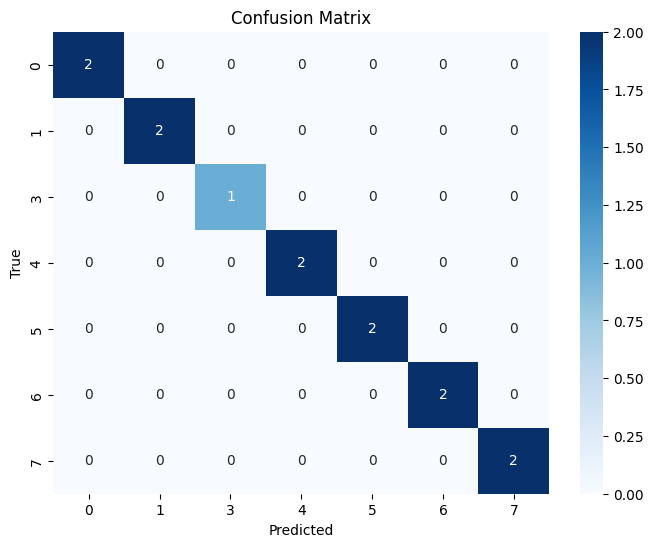

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define true labels and predicted labels
y_true = np.array([0, 0, 1, 1, 3, 4, 4, 5, 5, 6, 6, 7, 7])
y_pred = np.array([0, 0, 1, 1, 3, 4, 4, 5, 5, 6, 6, 7, 7])  # Use the provided predicted labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels
classes = np.unique(y_true)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
